## Setup

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import numpy as np
import json
import pandas as pd
from scipy import stats
import os

## Parameters

In [2]:
experiments = [
            #{'id': '1', 'source':'imdb', 'target':'uwcse', 'predicate':'workedunder', 'to_predicate':'advisedby', 'arity': 2},
            #{'id': '2', 'source':'uwcse', 'target':'imdb', 'predicate':'advisedby', 'to_predicate':'workedunder', 'arity': 2},
            #{'id': '3', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'samevenue', 'arity': 2},
            #{'id': '4', 'source':'cora', 'target':'imdb', 'predicate':'samevenue', 'to_predicate':'workedunder', 'arity': 2},
            ##{'id': '5', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'samevenue', 'arity': 2},
            ##{'id': '6', 'source':'cora', 'target':'uwcse', 'predicate':'samevenue', 'to_predicate':'advisedby', 'arity': 2},
            #{'id': '7', 'source':'yeast', 'target':'twitter', 'predicate':'proteinclass', 'to_predicate':'accounttype', 'arity': 2},
            #{'id': '8', 'source':'twitter', 'target':'yeast', 'predicate':'accounttype', 'to_predicate':'proteinclass', 'arity': 2},
            {'id': '9', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplayssport', 'to_predicate':'companyeconomicsector', 'arity': 2},
            {'id': '10', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyeconomicsector', 'to_predicate':'teamplayssport', 'arity': 2}
]

## Transfer Experiment

In [14]:
def load_data(experiments, metric, treeboostler=False, rdnb=False, stop=False):
    data = {}
    for item in experiments:
        experiment_title = item['id'] + '_' + item['source'] + '_' + item['target']
        
        if(treeboostler):
            file_path = os.path.split(os.getcwd())[0] + '/TreeBoostler/experiments-learning-curve/' + experiment_title + '/' + experiment_title + '.json'
        elif(rdnb):
            file_path = os.getcwd() + '/rdnb-curves-experiments/' + experiment_title + '/rdnb.json'
        else:
            file_path = os.getcwd() + '/transfer-experiments/' + experiment_title + '/' + experiment_title + '_fasttext_{}.json'.format(metric)
 
        #if(os.path.isfile(file_path)):
        with open(file_path, 'r') as fp:
            results = json.load(fp)

            data[experiment_title] = results
    return data

In [19]:
data_softcosine = load_data(experiments, 'softcosine')
data_euclidean = load_data(experiments, 'euclidean')
data_wmd = load_data(experiments, 'wmd')
data_rwmd = load_data(experiments, 'relax-wmd')

#treeboostler_data = load_data(experiments, '', True)

#rdn_data = load_data(experiments, '', False, True)

for metric in ['AUC ROC', 'AUC PR', 'CLL', 'Learning time']: #, 'Recall', 'F1', 'Precision', 'Learning and Revision time', 'Inference time']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data_euclidean:
            mapping_time = ''

            transfer_softcosine = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in data_softcosine[str(dataset)]])
            #transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
            transfer_euclidean = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in data_euclidean[str(dataset)]])
            transfer_wmd = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in data_wmd[str(dataset)]])
            transfer_relax_wmd = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd[str(dataset)]])

            #transfer_softcosine_stop = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in data_softcosine_stop[str(dataset)]])
            #transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
            #transfer_euclidean_stop = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in data_euclidean_stop[str(dataset)]])
            #transfer_wmd_stop = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in data_wmd_stop[str(dataset)]])
            #transfer_relax_wmd_stop = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd_stop[str(dataset)]])

            
            #treeboostler = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in treeboostler_data[str(dataset)]])
            #treeboostler_no_revision = np.array([(np.array([item['transfer_{}'.format(amount)]['parameter'][metric] for item in sublist])).mean() for sublist in treeboostler_data[str(dataset)]])
            #print(treeboostler)
            #rdnb = np.array([(np.array([item['amount_{}'.format(amount)][metric] for item in sublist])).mean() for sublist in rdn_data[str(dataset)]])

            table.append([dataset,
            '%.3f +/- %.3f' % (rdnb.mean(), 2* rdnb.std()),
            '%.3f +/- %.3f' % (treeboostler.mean(), 2* treeboostler.std()),
            #'%.3f +/- %.3f' % (treeboostler_no_revision.mean(), 2* treeboostler_no_revision.std()),
            '%.3f +/- %.3f' % (transfer_softcosine.mean(), 2 * transfer_softcosine.std()),
            #'%.3f +/- %.3f' % (transfer_cosine.mean(), 2 * transfer_cosine.std()),
            '%.3f +/- %.3f' % (transfer_euclidean.mean(), 2 * transfer_euclidean.std()),
            '%.3f +/- %.3f' % (transfer_wmd.mean(), 2 * transfer_wmd.std()),
            '%.3f +/- %.3f' % (transfer_relax_wmd.mean(), 2 * transfer_relax_wmd.std())])
            
            
            #table.append([dataset + '*',
            #'%.3f +/- %.3f' % (rdnb.mean(), 2* rdnb.std()),
            #'%.3f +/- %.3f' % (treeboostler.mean(), 2* treeboostler.std()),
            #'%.3f +/- %.3f' % (treeboostler_no_revision.mean(), 2* treeboostler_no_revision.std()),
            #'%.3f +/- %.3f' % (transfer_softcosine_stop.mean(), 2 * transfer_softcosine_stop.std()),
            #'%.3f +/- %.3f' % (transfer_cosine.mean(), 2 * transfer_cosine.std()),
            #'%.3f +/- %.3f' % (transfer_euclidean_stop.mean(), 2 * transfer_euclidean_stop.std()),
            #'%.3f +/- %.3f' % (transfer_wmd_stop.mean(), 2 * transfer_wmd_stop.std()),
            #'%.3f +/- %.3f' % (transfer_relax_wmd_stop.mean(), 2 * transfer_relax_wmd_stop.std())])
                            
    #display(pd.DataFrame(table, columns=['Experiment', 'RDN-B'])) #, 'Transfer Learning with Revision Theory - Relax WMD'])) #, 'Learning from scratch (RDN-B)']))
    display(pd.DataFrame(table, columns=['Experiment', 'RDN-B', 'TreeBoostler', 'Transfer Learning with Revision Theory - SoftCosine', 'Transfer Learning with Revision Theory - Euclidean', 'Transfer Learning with Revision Theory - WMD', 'Transfer Learning with Revision Theory - Relax WMD'])) #, 'Learning from scratch (RDN-B)']))
    #display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning', 'Transfer Learning with Revision Theory']))

# Results for AUC ROC

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD,Transfer Learning with Revision Theory - Relax WMD
0,9_nell_sports_nell_finances,0.748 +/- 0.039,0.751 +/- 0.083,0.694 +/- 0.009,0.731 +/- 0.080
1,9_nell_sports_nell_finances*,0.743 +/- 0.059,0.733 +/- 0.049,0.738 +/- 0.037,0.732 +/- 0.023
2,10_nell_finances_nell_sports,0.991 +/- 0.006,0.993 +/- 0.003,0.994 +/- 0.001,0.993 +/- 0.001
3,10_nell_finances_nell_sports*,0.993 +/- 0.003,0.991 +/- 0.002,0.993 +/- 0.002,0.994 +/- 0.001


# Results for AUC PR

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD,Transfer Learning with Revision Theory - Relax WMD
0,9_nell_sports_nell_finances,0.077 +/- 0.016,0.088 +/- 0.027,0.076 +/- 0.004,0.075 +/- 0.004
1,9_nell_sports_nell_finances*,0.071 +/- 0.034,0.078 +/- 0.029,0.082 +/- 0.022,0.084 +/- 0.020
2,10_nell_finances_nell_sports,0.244 +/- 0.101,0.288 +/- 0.040,0.299 +/- 0.035,0.312 +/- 0.067
3,10_nell_finances_nell_sports*,0.277 +/- 0.127,0.271 +/- 0.093,0.247 +/- 0.065,0.311 +/- 0.054


# Results for CLL

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD,Transfer Learning with Revision Theory - Relax WMD
0,9_nell_sports_nell_finances,-0.321 +/- 0.011,-0.320 +/- 0.016,-0.330 +/- 0.008,-0.325 +/- 0.014
1,9_nell_sports_nell_finances*,-0.327 +/- 0.009,-0.325 +/- 0.018,-0.315 +/- 0.003,-0.320 +/- 0.009
2,10_nell_finances_nell_sports,-0.166 +/- 0.145,-0.097 +/- 0.035,-0.085 +/- 0.002,-0.085 +/- 0.001
3,10_nell_finances_nell_sports*,-0.115 +/- 0.104,-0.140 +/- 0.040,-0.114 +/- 0.079,-0.101 +/- 0.047


# Results for Learning time

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD,Transfer Learning with Revision Theory - Relax WMD
0,9_nell_sports_nell_finances,174.724 +/- 84.579,158.171 +/- 51.731,147.918 +/- 27.345,208.753 +/- 49.646
1,9_nell_sports_nell_finances*,170.248 +/- 41.547,180.845 +/- 85.024,228.766 +/- 93.801,215.018 +/- 26.584
2,10_nell_finances_nell_sports,294.552 +/- 547.910,341.999 +/- 176.276,394.017 +/- 83.640,516.902 +/- 313.044
3,10_nell_finances_nell_sports*,497.562 +/- 653.464,867.359 +/- 920.882,456.371 +/- 536.338,848.246 +/- 512.231


## Curve Experiment

In [20]:
def load_data(experiments, metric, treeboostler=False, rdnb=False, stop=False):
    data = {}
    for item in experiments:
        experiment_title = item['id'] + '_' + item['source'] + '_' + item['target']
        
        if(treeboostler):
            file_path = os.path.split(os.getcwd())[0] + '/TreeBoostler/experiments-learning-curve/' + experiment_title + '/' + experiment_title + '.json'
        elif(rdnb):
            file_path = os.getcwd() + '/rdnb-curves-experiments/' + experiment_title + '/rdnb.json'
        else:
            file_path = os.getcwd() + '/curves-experiments/' + experiment_title + '/' + experiment_title + '_fasttext_{}.json'.format(metric)
        
        #if(os.path.isfile(file_path)):
        with open(file_path, 'r') as fp:
            results = json.load(fp)

            data[experiment_title] = results
    return data

# Results for AUC ROC

# 9_nell_sports_nell_finances

<ipython-input-45-7a6bfc4f6b13>:80: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, relax_wmd, 'x-', linestyle='-', color='k', label='TransBoostler Relax-WMD')
<ipython-input-45-7a6bfc4f6b13>:88: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, relax_wmd_stop, 'x-', linestyle='-', color='g', label='TransBoostler Relax-WMD*')


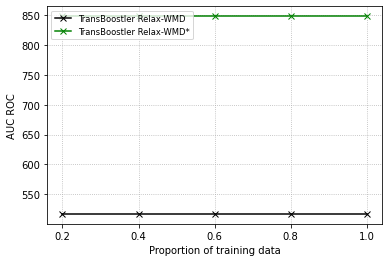

# 10_nell_finances_nell_sports

<ipython-input-45-7a6bfc4f6b13>:80: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, relax_wmd, 'x-', linestyle='-', color='k', label='TransBoostler Relax-WMD')
<ipython-input-45-7a6bfc4f6b13>:88: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, relax_wmd_stop, 'x-', linestyle='-', color='g', label='TransBoostler Relax-WMD*')


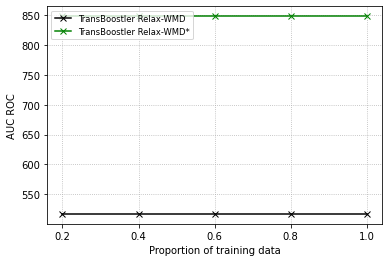

# Results for AUC PR

# 9_nell_sports_nell_finances

<ipython-input-45-7a6bfc4f6b13>:80: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, relax_wmd, 'x-', linestyle='-', color='k', label='TransBoostler Relax-WMD')
<ipython-input-45-7a6bfc4f6b13>:88: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, relax_wmd_stop, 'x-', linestyle='-', color='g', label='TransBoostler Relax-WMD*')


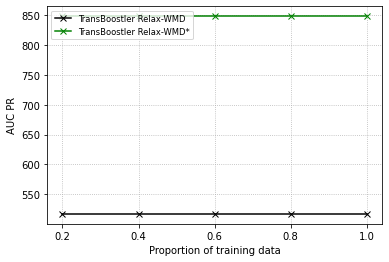

# 10_nell_finances_nell_sports

<ipython-input-45-7a6bfc4f6b13>:80: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, relax_wmd, 'x-', linestyle='-', color='k', label='TransBoostler Relax-WMD')
<ipython-input-45-7a6bfc4f6b13>:88: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, relax_wmd_stop, 'x-', linestyle='-', color='g', label='TransBoostler Relax-WMD*')


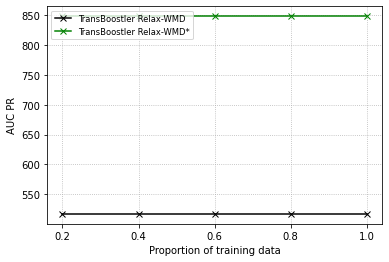

In [45]:
data_softcosine = load_data(experiments, 'softcosine')
data_euclidean = load_data(experiments, 'euclidean')
data_wmd = load_data(experiments, 'wmd')
data_rwmd = load_data(experiments, 'relax-wmd')

#rdnb_data = load_data(experiments, '', False, True)

#treeboostler_data = load_data(experiments, '', True)

for metric in ['AUC ROC', 'AUC PR']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data_euclidean:
            display(Markdown('# ' + dataset))
            softcosine = []
            cosine = []
            euclidean = []
            wmd = []
            relax_wmd = []
            
            tree = []
            rdn_b_p = []
            for amount in [0.2, 0.4, 0.6, 0.8, 1.0]:
                mapping_time = ''
                
                #treeboostler = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in treeboostler_data[str(dataset)]])
                transfer_softcosine = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_softcosine[str(dataset)]])
                #transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
                transfer_euclidean = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_euclidean[str(dataset)]])
                transfer_wmd = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_wmd[str(dataset)]])
                transfer_rwmd = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd[str(dataset)]])
                #rdnb = np.array([(np.array([item['amount_'+str(amount)][metric] for item in sublist])).mean() for sublist in rdnb_data[str(dataset)]])
                
                #tree.append(treeboostler.mean())
                softcosine.append(transfer_softcosine.mean())
                #cosine.append(transfer_cosine.mean())
                euclidean.append(transfer_euclidean.mean())
                wmd.append(transfer_wmd.mean())
                relax_wmd.append(transfer_relax_wmd.mean())
                #rdn_b_p.append(rdnb.mean())

            t = [0.2, 0.4, 0.6, 0.8, 1.0]
            fig, ax = plt.subplots()
            #ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
            #ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
            ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
            ax.plot(t, softcosine, 's-', linestyle='--', color='k', label='TransBoostler SoftCosine')
            ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
            ax.plot(t, relax_wmd, 'x-', linestyle='-', color='k', label='TransBoostler Relax-WMD')
            #ax.plot(t, rdn_b_p, '8-', linestyle='-', color='k', label='RDN-B')

            #ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
            #ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
            #ax.plot(t, euclidean_stop, 's-', linestyle='--', color='k', label='TransBoostler Euclidean*')
            #ax.plot(t, softcosine_stop, 's-', linestyle='--', color='k', label='TransBoostler SoftCosine(')
            #ax.plot(t, wmd_stop, 'x-', linestyle='-', color='k', label='TransBoostler WMD*')
            #ax.plot(t, relax_wmd_stop, 'x-', linestyle='-', color='k', label='TransBoostler Relax-WMD*')
            #ax.plot(t, rdn_b_p, '8-', linestyle='-', color='k', label='RDN-B')


            ax.set(xlabel='Proportion of training data', ylabel=metric)
            ax.grid(linestyle = ':')
            ax.legend(loc='upper left', fontsize='small', frameon=True)
            plt.xticks(t,t)
            plt.show()
            
            if not os.path.exists('learning_curves'):
                os.makedirs('learning_curves')
            fig.savefig("learning_curves/{}_{}.pdf".format(dataset, '_'.join(metric.split())), bbox_inches='tight')

## Minimal Data

In [8]:
def load_data(experiments, metric, treeboostler=False):
    data = {}
    for item in experiments:
        experiment_title = item['id'] + '_' + item['source'] + '_' + item['target']
        
        if(treeboostler):
            file_path = os.path.split(os.getcwd())[0] + '/TreeBoostler/experiments-learning-curve-small/' + experiment_title + '/' + experiment_title + '.json'
        else:
            file_path = os.getcwd() + '/experiments-learning-curve-small/' + experiment_title + '/' + experiment_title + '_fasttext_{}.json'.format(metric)
        
        #if(os.path.isfile(file_path)):
        with open(file_path, 'r') as fp:
            results = json.load(fp)

            data[experiment_title] = results
    return data

# Results for AUC ROC

# 1_imdb_uwcse

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

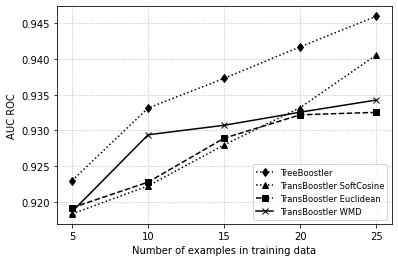

# 3_imdb_cora

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

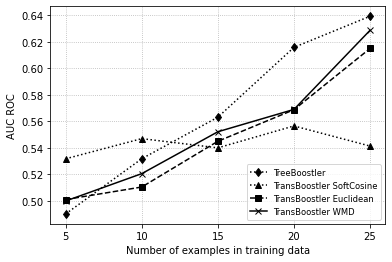

# 4_cora_imdb

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

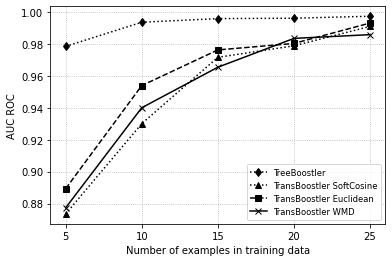

# 7_yeast_twitter

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

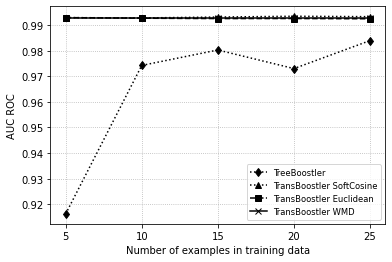

# 8_twitter_yeast

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

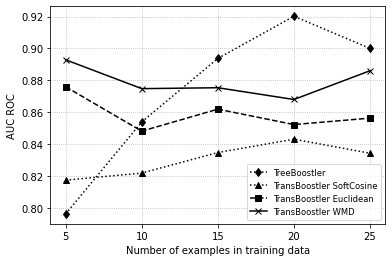

# 9_nell_sports_nell_finances

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

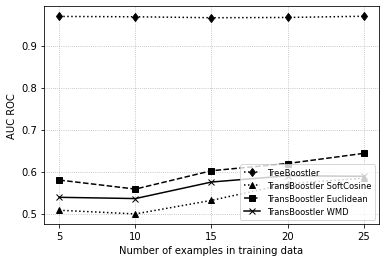

# Results for AUC PR

# 1_imdb_uwcse

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

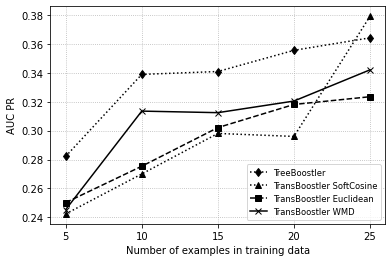

# 3_imdb_cora

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

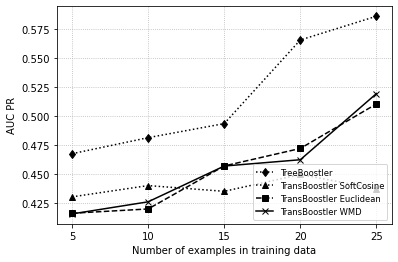

# 4_cora_imdb

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

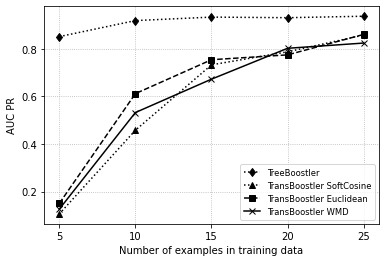

# 7_yeast_twitter

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

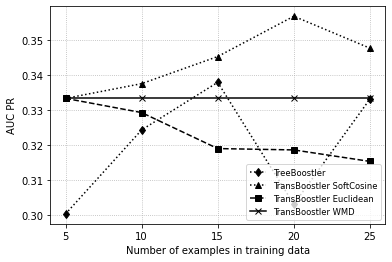

# 8_twitter_yeast

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

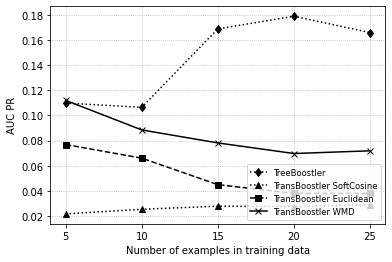

# 9_nell_sports_nell_finances

<ipython-input-9-74c0c86aae15>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
<ipython-input-9-74c0c86aae15>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
<ipython-input-9-74c0c86aae15>:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
<ipython-input-9-74c0c86aae15>:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt 

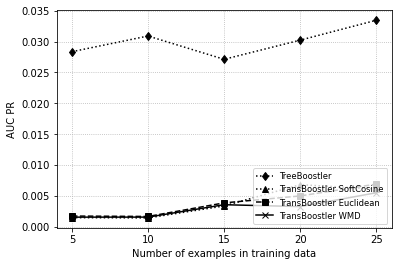

In [9]:
data_softcosine = load_data(experiments, 'softcosine')
data_euclidean = load_data(experiments, 'euclidean')
data_wmd = load_data(experiments, 'wmd')

treeboostler_data = load_data(experiments, '', True)

for metric in ['AUC ROC', 'AUC PR']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in treeboostler_data:
            display(Markdown('# ' + dataset))
            softcosine = []
            cosine = []
            euclidean = []
            wmd = []
            relax_wmd = []
            tree = []
            rdn_b_p = []
            for amount in [5, 10, 15, 20, 25]:
                mapping_time = ''
                
                treeboostler = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in treeboostler_data[str(dataset)]])
                transfer_softcosine = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_softcosine[str(dataset)]])
                #transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
                transfer_euclidean = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_euclidean[str(dataset)]])
                transfer_wmd = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_wmd[str(dataset)]])
                #transfer_relax_wmd = np.array(data[dataset]['relax-wmd'][str(amount)][metric])

                tree.append(treeboostler.mean())
                softcosine.append(transfer_softcosine.mean())
                #cosine.append(transfer_cosine.mean())
                euclidean.append(transfer_euclidean.mean())
                wmd.append(transfer_wmd.mean())
                #relax_wmd.append(transfer_relax_wmd.mean())
                #rdn_p.append(scratch_rdn.mean())

            t = [5, 10, 15, 20, 25]
            fig, ax = plt.subplots()
            ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
            ax.plot(t, softcosine, '^-', linestyle=':', color='k', label='TransBoostler SoftCosine')
            #ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
            ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
            ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
            #ax.plot(t, relax_wmd, 'x-', linestyle='-', color='k', label='TransBoostler Relax-WMD')

            ax.set(xlabel='Number of examples in training data', ylabel=metric)
            ax.grid(linestyle = ':')
            ax.legend(loc='lower right', fontsize='small', frameon=True)
            plt.xticks(t,t)
            plt.show()
            
            if not os.path.exists('minimal_data_figures'):
                os.makedirs('minimal_data_figures')
            fig.savefig("minimal_data_figures/{}_{}.pdf".format(dataset, '_'.join(metric.split())), bbox_inches='tight')

## Confusion Matrix

In [13]:
for metric in ['TP', 'TN', 'FP', 'FN']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data:
            #display(Markdown('# ' + dataset))
            softcosine = []
            cosine = []
            euclidean = []
            wmd = []
            relax_wmd = []
            rdn_p = []
            rdn_b_p = []
            for amount in [0.2, 0.4, 0.6, 0.8, 1.0]:
                mapping_time = ''
                transfer_softcosine = np.array(data[dataset]['softcosine'][str(amount)][metric])
                transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
                transfer_euclidean = np.array(data[dataset]['euclidean'][str(amount)][metric])
                transfer_wmd = np.array(data[dataset]['wmd'][str(amount)][metric])
                transfer_relax_wmd = np.array(data[dataset]['relax-wmd'][str(amount)][metric])

                softcosine.append(transfer_softcosine.mean())
                cosine.append(transfer_cosine.mean())
                euclidean.append(transfer_euclidean.mean())
                wmd.append(transfer_wmd.mean())
                relax_wmd.append(transfer_relax_wmd.mean())
                #rdn_p.append(scratch_rdn.mean())

            table.append([dataset +'_' + str(amount), 
                '%.3f +/- %.3f' % (transfer_softcosine.mean(), 2 * transfer_softcosine.std()),
                '%.3f +/- %.3f' % (transfer_cosine.mean(), 2 * transfer_cosine.std()),
                '%.3f +/- %.3f' % (transfer_euclidean.mean(), 2 * transfer_euclidean.std()),
                '%.3f +/- %.3f' % (transfer_wmd.mean(), 2 * transfer_wmd.std()),
                '%.3f +/- %.3f' % (transfer_relax_wmd.mean(), 2 * transfer_relax_wmd.std())])
                 #             ])
    display(pd.DataFrame(table, columns=['Experiment', 'TransBoostler SoftCosine', 'TransBoostler Cosine', 'TransBoostler Euclidean', 'TransBooslter WMD', 'TransBoostler Relax WMD'])) #, 'Learning from scratch (RDN-B)']))
    #display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning', 'Transfer Learning with Revision Theory']))

# Results for TP

,Experiment,TransBoostler SoftCosine,TransBoostler Cosine,TransBoostler Euclidean,TransBooslter WMD,TransBoostler Relax WMD
0,1_imdb_uwcse_1.0,22.400 +/- 20.223,22.400 +/- 20.223,22.600 +/- 19.944,22.400 +/- 20.064,22.600 +/- 19.944
1,2_uwcse_imdb_1.0,76.400 +/- 102.173,76.400 +/- 102.173,76.400 +/- 102.173,76.400 +/- 102.173,76.400 +/- 102.173
2,3_imdb_cora_1.0,369.800 +/- 562.536,366.400 +/- 559.769,370.800 +/- 562.289,372.800 +/- 565.056,370.800 +/- 562.357
3,7_yeast_twitter_1.0,107.000 +/- 36.000,108.000 +/- 38.000,108.500 +/- 33.000,109.000 +/- 34.000,108.500 +/- 39.000
4,8_twitter_yeast_1.0,70.000 +/- 22.045,71.250 +/- 21.880,60.250 +/- 9.314,66.250 +/- 12.114,76.500 +/- 13.077
5,9_nell_sports_nell_finances_1.0,61.667 +/- 39.542,70.000 +/- 11.431,89.667 +/- 24.459,88.000 +/- 36.368,101.667 +/- 12.472


# Results for TN

,Experiment,TransBoostler SoftCosine,TransBoostler Cosine,TransBoostler Euclidean,TransBooslter WMD,TransBoostler Relax WMD
0,1_imdb_uwcse_1.0,20.000 +/- 17.889,20.200 +/- 17.817,20.400 +/- 19.457,20.800 +/- 19.325,20.400 +/- 19.457
1,2_uwcse_imdb_1.0,75.600 +/- 102.875,75.600 +/- 102.875,75.600 +/- 102.875,75.600 +/- 102.875,75.600 +/- 102.875
2,3_imdb_cora_1.0,364.800 +/- 472.114,366.800 +/- 474.344,364.400 +/- 478.402,363.000 +/- 474.433,363.400 +/- 475.428
3,7_yeast_twitter_1.0,107.500 +/- 21.000,107.500 +/- 21.000,108.000 +/- 20.000,109.000 +/- 22.000,108.500 +/- 21.000
4,8_twitter_yeast_1.0,88.250 +/- 8.761,89.250 +/- 9.631,90.500 +/- 11.874,89.250 +/- 12.278,88.250 +/- 9.937
5,9_nell_sports_nell_finances_1.0,251.667 +/- 10.625,251.000 +/- 4.320,246.000 +/- 7.118,245.333 +/- 6.600,242.667 +/- 4.989


# Results for FP

,Experiment,TransBoostler SoftCosine,TransBoostler Cosine,TransBoostler Euclidean,TransBooslter WMD,TransBoostler Relax WMD
0,1_imdb_uwcse_1.0,2.600 +/- 2.400,2.400 +/- 2.713,2.200 +/- 0.800,1.800 +/- 1.960,2.200 +/- 0.800
1,2_uwcse_imdb_1.0,0.800 +/- 1.497,0.800 +/- 1.497,0.800 +/- 1.497,0.800 +/- 1.497,0.800 +/- 1.497
2,3_imdb_cora_1.0,183.200 +/- 383.263,181.200 +/- 384.269,183.600 +/- 389.134,185.000 +/- 385.219,184.600 +/- 387.531
3,7_yeast_twitter_1.0,33.500 +/- 9.000,33.500 +/- 9.000,33.000 +/- 10.000,32.000 +/- 8.000,32.500 +/- 9.000
4,8_twitter_yeast_1.0,4.000 +/- 7.071,3.000 +/- 6.164,1.750 +/- 2.958,3.000 +/- 2.449,4.000 +/- 6.000
5,9_nell_sports_nell_finances_1.0,7.667 +/- 8.994,8.333 +/- 2.494,13.333 +/- 6.182,14.000 +/- 4.899,16.667 +/- 3.771


# Results for FN

,Experiment,TransBoostler SoftCosine,TransBoostler Cosine,TransBoostler Euclidean,TransBooslter WMD,TransBoostler Relax WMD
0,1_imdb_uwcse_1.0,0.200 +/- 0.800,0.200 +/- 0.800,0.000 +/- 0.000,0.200 +/- 0.800,0.000 +/- 0.000
1,2_uwcse_imdb_1.0,0.000 +/- 0.000,0.000 +/- 0.000,0.000 +/- 0.000,0.000 +/- 0.000,0.000 +/- 0.000
2,3_imdb_cora_1.0,233.600 +/- 510.463,237.000 +/- 506.126,232.600 +/- 508.987,230.600 +/- 514.437,232.600 +/- 509.014
3,7_yeast_twitter_1.0,34.000 +/- 6.000,33.000 +/- 8.000,32.500 +/- 3.000,32.000 +/- 4.000,32.500 +/- 9.000
4,8_twitter_yeast_1.0,22.250 +/- 17.110,21.000 +/- 14.560,32.000 +/- 19.339,26.000 +/- 25.338,15.750 +/- 5.723
5,9_nell_sports_nell_finances_1.0,197.667 +/- 40.738,189.333 +/- 12.684,169.667 +/- 24.998,171.333 +/- 37.854,157.667 +/- 14.267
